# Import packages

In [1]:
import requests
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data generation

In [4]:
# As Random User Generator allows us to fetch up to 5,000 generated users 
#     in one request using the results parameter, we will use Random User Generator 2 times,
#     5000 new users in every time

In [5]:
r_1 = requests.get('https://randomuser.me/api/?results=5000')

In [6]:
r_2 = requests.get('https://randomuser.me/api/?results=5000')

In [7]:
r_1.status_code

200

In [8]:
data_1 = r_1.json()
data_2 = r_2.json()

In [9]:
print('type -', type(data_1))
print('len -', len(data_1))

type - <class 'dict'>
len - 2


In [10]:
data_1.keys()

dict_keys(['results', 'info'])

In [11]:
print(len(data_1['results']))
print(len(data_1['info']))

5000
4


In [12]:
data_1['info']

{'seed': 'd3c1ed721b5d5e29', 'results': 5000, 'page': 1, 'version': '1.3'}

In [13]:
data_1['results'][0]

{'gender': 'female',
 'name': {'title': 'Mrs', 'first': 'Lola', 'last': 'Mcdonalid'},
 'location': {'street': {'number': 78, 'name': 'Queensway'},
  'city': 'Westminster',
  'state': 'Cleveland',
  'country': 'United Kingdom',
  'postcode': 'P4 0FG',
  'coordinates': {'latitude': '14.9900', 'longitude': '5.2992'},
  'timezone': {'offset': '+5:30',
   'description': 'Bombay, Calcutta, Madras, New Delhi'}},
 'email': 'lola.mcdonalid@example.com',
 'login': {'uuid': 'a97b0ae1-0fa8-42f8-a61b-7c3e48376f3b',
  'username': 'sadladybug790',
  'password': 'alive',
  'salt': '8QHj8I4y',
  'md5': 'bef41a503fbe11554b4b1f13f4416312',
  'sha1': 'ec3cd9c317c4eb1b5025297243a20c5438eac4f9',
  'sha256': '578b85f3531dfc764b7c057c084f8283c4c75562b436c0ddeca821a7c9e43abd'},
 'dob': {'date': '1955-06-23T17:58:18.593Z', 'age': 66},
 'registered': {'date': '2017-11-15T04:25:07.553Z', 'age': 4},
 'phone': '013873 08894',
 'cell': '0769-456-124',
 'id': {'name': 'NINO', 'value': 'MR 89 89 27 O'},
 'picture': {'

In [14]:
type(data_1['results'])

list

In [15]:
data = data_1['results'] + data_2['results']
len(data)

10000

# Data preprocessing

In [16]:
# Let's remove all duplicates if they exist
res = []
len([res.append(x) for x in data if x not in res])

10000

In [17]:
# ⬆ there were not duplicates

In [18]:
data[0]

{'gender': 'female',
 'name': {'title': 'Mrs', 'first': 'Lola', 'last': 'Mcdonalid'},
 'location': {'street': {'number': 78, 'name': 'Queensway'},
  'city': 'Westminster',
  'state': 'Cleveland',
  'country': 'United Kingdom',
  'postcode': 'P4 0FG',
  'coordinates': {'latitude': '14.9900', 'longitude': '5.2992'},
  'timezone': {'offset': '+5:30',
   'description': 'Bombay, Calcutta, Madras, New Delhi'}},
 'email': 'lola.mcdonalid@example.com',
 'login': {'uuid': 'a97b0ae1-0fa8-42f8-a61b-7c3e48376f3b',
  'username': 'sadladybug790',
  'password': 'alive',
  'salt': '8QHj8I4y',
  'md5': 'bef41a503fbe11554b4b1f13f4416312',
  'sha1': 'ec3cd9c317c4eb1b5025297243a20c5438eac4f9',
  'sha256': '578b85f3531dfc764b7c057c084f8283c4c75562b436c0ddeca821a7c9e43abd'},
 'dob': {'date': '1955-06-23T17:58:18.593Z', 'age': 66},
 'registered': {'date': '2017-11-15T04:25:07.553Z', 'age': 4},
 'phone': '013873 08894',
 'cell': '0769-456-124',
 'id': {'name': 'NINO', 'value': 'MR 89 89 27 O'},
 'picture': {'

In [19]:
# let's create columns of our dataframe. We don't use all the information from 'data' list.
# For example, coordinates are not valuable information for future EDA.

gender = []
title = []
first_name = []
last_name = []
street_number = []
street_name = []
city = []
state = []
country = []
postcode = []
email = []
username = []
password = []
age = []
phone = []
cell = []
nat = []      # nat for nationality 

In [20]:
for i in data:
    gender.append(i['gender'])
    title.append(i['name']['title'])
    first_name.append(i['name']['first'])
    last_name.append(i['name']['last'])
    street_number.append(i['location']['street']['number'])
    street_name.append(i['location']['street']['name'])
    city.append(i['location']['city'])
    state.append(i['location']['state'])
    country.append(i['location']['country'])
    postcode.append(i['location']['postcode'])
    email.append(i['email'])
    username.append(i['login']['username'])
    password.append(i['login']['password'])
    age.append(i['dob']['age'])
    phone.append(i['phone'])
    cell.append(i['cell'])
    nat.append(i['nat'])

In [21]:
df = pd.DataFrame(list(zip(first_name,last_name,gender,title,age,nat,country,state,city,street_name,
                           street_number,postcode,phone,cell,email,username,password)),
                  columns = ['first_name','last_name','gender','title','age','nat','country','state','city',
                             'street_name','street_number','postcode','phone','cell','email','username','password'])

In [22]:
df

,first_name,last_name,gender,title,age,nat,country,state,city,street_name,street_number,postcode,phone,cell,email,username,password
0,Lola,Mcdonalid,female,Mrs,66,GB,United Kingdom,Cleveland,Westminster,Queensway,78,P4 0FG,013873 08894,0769-456-124,lola.mcdonalid@example.com,sadladybug790,alive
1,Estelle,Martinez,female,Miss,39,FR,France,Alpes-Maritimes,Nancy,Rue de Cuire,5725,82167,03-04-20-78-34,06-89-29-24-70,estelle.martinez@example.com,smallfish105,channel
2,Paul,Olivier,male,Mr,26,FR,France,Dordogne,Dijon,Place de L'Abbé-Georges-Hénocque,8586,54038,01-68-38-67-56,06-63-49-01-60,paul.olivier@example.com,crazyelephant615,dodgers
3,Vildan,Elçiboğa,female,Miss,66,TR,Turkey,Kocaeli,Şırnak,Abanoz Sk,7964,48532,(264)-871-6729,(904)-287-1353,vildan.elciboga@example.com,beautifulleopard232,frodo1
4,Asta,Rasmussen,female,Ms,23,DK,Denmark,Sjælland,Lundby,Skovbovej,7501,67571,33509617,71270627,asta.rasmussen@example.com,crazyelephant792,poopy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sophie,Claire,female,Miss,57,CA,Canada,Newfoundland and Labrador,Westport,Brock Rd,3865,Y3C 7I8,346-183-3407,758-986-2443,sophie.claire@example.com,ticklishpanda658,23skidoo
9996,Liron,Jobse,male,Mr,24,NL,Netherlands,Utrecht,West-Graftdijk,Kruisweg,8929,34307,(336)-478-5432,(069)-383-7995,liron.jobse@example.com,purplemeercat997,solo
9997,Troy,Long,male,Mr,44,AU,Australia,South Australia,Cairns,Stevens Creek Blvd,6924,7367,07-8399-5488,0490-672-402,troy.long@example.com,greenelephant236,skibum
9998,Benjamin,Boyd,male,Mr,50,AU,Australia,New South Wales,Geraldton,Daisy Dr,4484,6266,08-8808-2132,0486-279-402,benjamin.boyd@example.com,crazypanda320,lopez


In [23]:
# So, our dataframe is ready ⬆

# EDA

In [24]:
df.head()

,first_name,last_name,gender,title,age,nat,country,state,city,street_name,street_number,postcode,phone,cell,email,username,password
0,Lola,Mcdonalid,female,Mrs,66,GB,United Kingdom,Cleveland,Westminster,Queensway,78,P4 0FG,013873 08894,0769-456-124,lola.mcdonalid@example.com,sadladybug790,alive
1,Estelle,Martinez,female,Miss,39,FR,France,Alpes-Maritimes,Nancy,Rue de Cuire,5725,82167,03-04-20-78-34,06-89-29-24-70,estelle.martinez@example.com,smallfish105,channel
2,Paul,Olivier,male,Mr,26,FR,France,Dordogne,Dijon,Place de L'Abbé-Georges-Hénocque,8586,54038,01-68-38-67-56,06-63-49-01-60,paul.olivier@example.com,crazyelephant615,dodgers
3,Vildan,Elçiboğa,female,Miss,66,TR,Turkey,Kocaeli,Şırnak,Abanoz Sk,7964,48532,(264)-871-6729,(904)-287-1353,vildan.elciboga@example.com,beautifulleopard232,frodo1
4,Asta,Rasmussen,female,Ms,23,DK,Denmark,Sjælland,Lundby,Skovbovej,7501,67571,33509617,71270627,asta.rasmussen@example.com,crazyelephant792,poopy


In [25]:
# Let's check for missing values

df.isnull().sum()

first_name       0
last_name        0
gender           0
title            0
age              0
nat              0
country          0
state            0
city             0
street_name      0
street_number    0
postcode         0
phone            0
cell             0
email            0
username         0
password         0
dtype: int64

In [26]:
#  Let us check the data types of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     10000 non-null  object
 1   last_name      10000 non-null  object
 2   gender         10000 non-null  object
 3   title          10000 non-null  object
 4   age            10000 non-null  int64 
 5   nat            10000 non-null  object
 6   country        10000 non-null  object
 7   state          10000 non-null  object
 8   city           10000 non-null  object
 9   street_name    10000 non-null  object
 10  street_number  10000 non-null  int64 
 11  postcode       10000 non-null  object
 12  phone          10000 non-null  object
 13  cell           10000 non-null  object
 14  email          10000 non-null  object
 15  username       10000 non-null  object
 16  password       10000 non-null  object
dtypes: int64(2), object(15)
memory usage: 742.2+ KB


In [27]:
# Let's one more time drop duplicates, if they exist

len(df.drop_duplicates())

10000

In [28]:
# They don't exist. Everythin is fine. Let's move on.

In [29]:
# Let's get the number of unique values for each attribute

for col in df:
    print(col, '-', len(df[col].unique()))

first_name - 3308
last_name - 2694
gender - 2
title - 7
age - 55
nat - 17
country - 17
state - 545
city - 3498
street_name - 2440
street_number - 6310
postcode - 9666
phone - 10000
cell - 10000
email - 9745
username - 9925
password - 5644


### <span style="color:green">Gender</span>

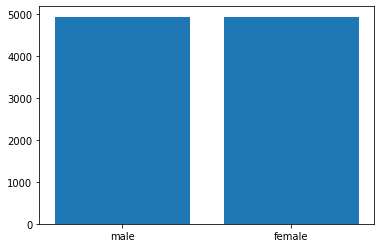

In [30]:
x = np.array(["male", "female"])
y = np.array([len(df[df['gender'] == 'female']),len(df[df['gender'] == 'female'])])

plt.bar(x,y)
plt.show()

In [31]:
# Males and females are almost equal

print(x[0],'-',y[0])
print(x[1],'-',y[1])

male - 4930
female - 4930


### <span style="color:green">Title</span>

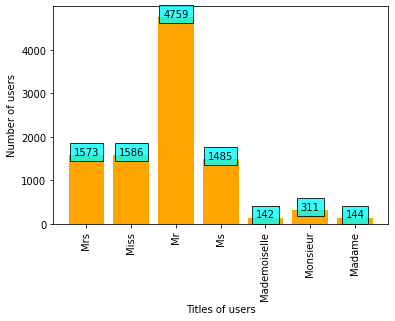

In [32]:
# Function to add value labels

def valuelabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))
        
# Main function
  
    
# Define data
x = df['title'].unique()
y = np.array([len(df[df['title'] == i]) for i in x])



# Plot bar chart
plt.bar(x, y, color= 'orange')

# Call function
valuelabel(x, y)       

# Define labels
plt.xlabel("Titles of users")
plt.ylabel("Number of users")

plt.xticks(rotation=90)

# Display plot
plt.show()

In [33]:
# Here, we see that among users most of them are have 'Mr' title and the least of them have 'Mademoiselle' title.

### <span style="color:green">Age</span>

In [34]:
df['age'].describe()

count    10000.000000
mean        49.799400
std         15.676656
min         23.000000
25%         36.000000
50%         50.000000
75%         63.000000
max         77.000000
Name: age, dtype: float64

In [36]:
# The youngest user is 23 years old and the oldest one is 77 years old

### <span style="color:green">Country, state</span>

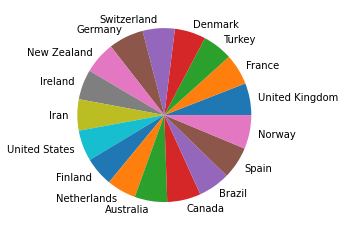

In [37]:
x = df['country'].unique()
y = np.array([len(df[df['country'] == i]) for i in x])

plt.pie(y, labels = x)
plt.show() 

In [38]:
# Here we see that all 10000 users are almost equally distributed amoung 17 countries

In [39]:
by_countries_states = df.groupby(['country','state']).count()[['first_name']]

In [40]:
by_countries_states

first_name
country       state                                   
Australia     Australian Capital Territory          73
              New South Wales                       57
              Northern Territory                    70
              Queensland                            89
              South Australia                      100
...                                                ...
United States Virginia                              12
              Washington                            16
              West Virginia                         13
              Wisconsin                             12
              Wyoming                               16

[546 rows x 1 columns]

In [41]:
by_countries_states[by_countries_states['first_name'] == by_countries_states['first_name'].min()]

first_name
country state                
France  Guyane              1
        Var                 1
Turkey  Şanlıurfa           1

In [42]:
by_countries_states[by_countries_states['first_name'] == by_countries_states['first_name'].max()]

,,first_name
country,state,
Denmark,Midtjylland,115


In [48]:
# Here we see that the states with the least users are Guyane, Var, Şanlıurfa
#           and the only state with the most users is Midtjylland in Denmark

### <span style="color:green">Country, gender</span>

In [44]:
by_countries_gender = df.groupby(['country','gender']).count()[['first_name']]

In [45]:
by_countries_gender

first_name
country        gender            
Australia      female         306
               male           299
Brazil         female         295
               male           298
Canada         female         315
               male           310
Denmark        female         290
               male           288
Finland        female         241
               male           300
France         female         311
               male           264
Germany        female         344
               male           308
Iran           female         259
               male           322
Ireland        female         276
               male           281
Netherlands    female         270
               male           275
New Zealand    female         271
               male           325
Norway         female         301
               male           328
Spain          female         293
               male           306
Switzerland    female         286
               male           311
Turkey         female         281
               male           278
United Kingdom female         314
               male           279
United States  female         277
               male           298

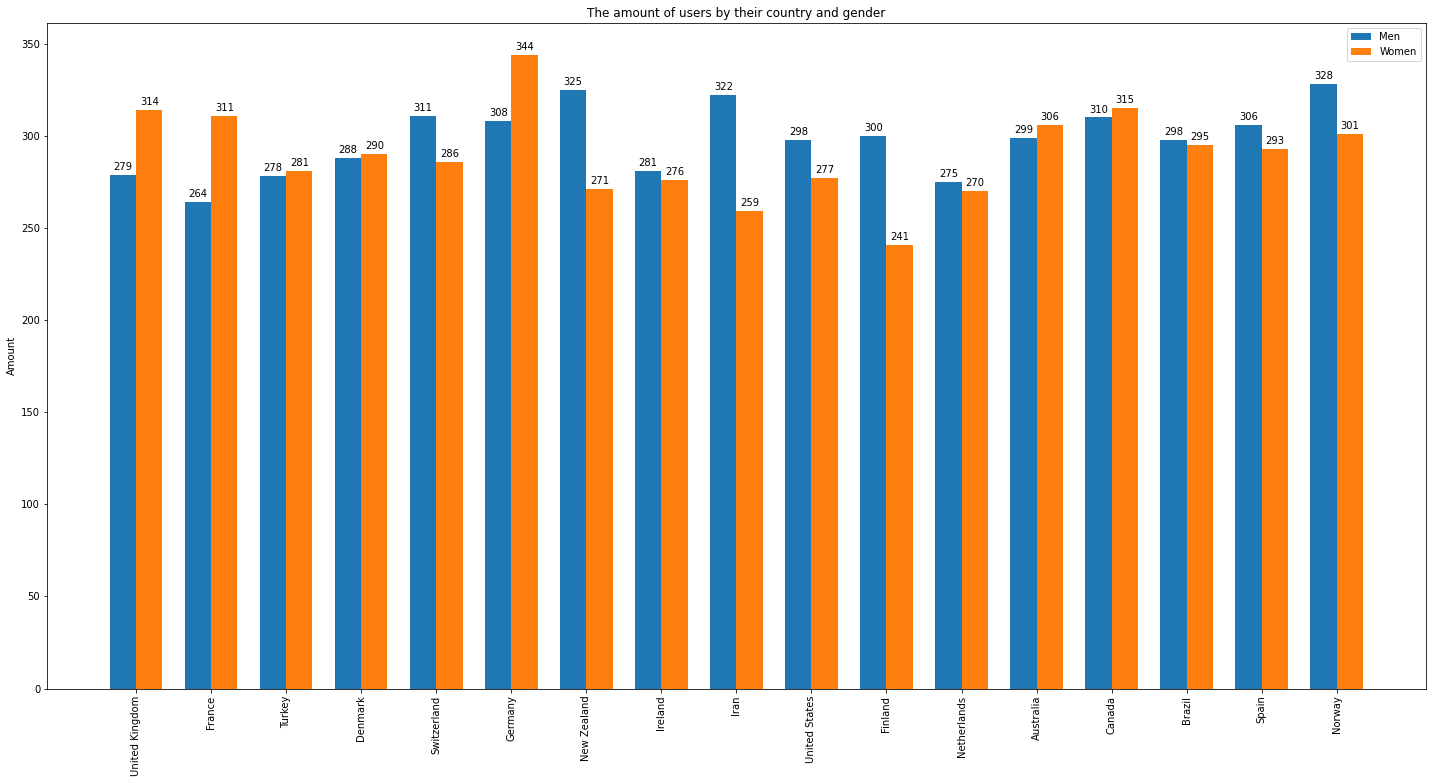

In [46]:
labels = df['country'].unique()
male = [by_countries_gender.loc[i].loc['male'][0] for i in labels]
female = [by_countries_gender.loc[i].loc['female'][0] for i in labels]

plt.rcParams["figure.figsize"] = (20,10)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Men')
rects2 = ax.bar(x + width/2, female, width, label='Women')

ax.set_ylabel('Amount')
ax.set_title('The amount of users by their country and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [47]:
# I introduced the most interesting feature analysis of my dataframe.

# <span style="color:red">Conclusion</span>

### 1) There are equal number of males and females
### 2) From 10000 users 4759 (47,59%) have 'Mr' title and 142(1.42%) have 'Mademoiselle' title 
### 3) The youngest user is 23 years old, and the oldest user is 77 years old
### 4) All 10000 users are almost equally distributed amoung 17 countries
### 5) Here we see that the states with the least users are Guyane, Var, Şanlıurfa and the only state with the most users is Midtjylland in Denmark

# <span style="color:red">Thank you</span>